# 1906001

# ASSIGNMENT-1

1.Read breast-cancer  dataset  (shared  with  the  named  “breast_cancer.csv”  in  the file  section inside the dataset folder) using Linear Regression, Logistic Regression, and SVM. 

2.Read and analyze the breast_cancer dataset (shared with the named “breast_cancer.csv” in the file section inside the dataset folder) using Linear Regression, Logistic Regression, and SVM, calculate the Precision, Recall, Accuracy and F1-score.

3.Display the graph plots of the Scatter and histogram using Linear Regression, and SVM methods. Also display the boxplot and scatter plots using Logistic Regression method.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics

In [2]:
d=pd.read_csv('breast_cancer.csv')

In [3]:
d

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
d=d.drop(columns={'id','Unnamed: 32'})

In [5]:
d

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
d.shape

(569, 31)

In [7]:
d.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
X=d.iloc[:,1:31]

In [9]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
y=d.iloc[:,0]

In [11]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [12]:
idx=(y=='M')

In [13]:
idx

0       True
1       True
2       True
3       True
4       True
       ...  
564     True
565     True
566     True
567     True
568    False
Name: diagnosis, Length: 569, dtype: bool

In [14]:
y[idx]=1
y[~idx]=0

<ipython-input-14-4628f62ef805>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[idx]=1
<ipython-input-14-4628f62ef805>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[~idx]=0


In [15]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: object

In [16]:
y=np.array(y,dtype='int')

In [17]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [36]:
# pca=PCA(n_components=1)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

# Linear Regression

In [20]:
lin=LinearRegression()
lin.fit(X_train,y_train)
y_pred1=lin.predict(X_test)

In [21]:
y_pred1

array([ 0.77320788,  0.18922025,  0.01915998,  0.19931013,  0.03234754,
        0.08025409, -0.05073582,  0.02772789, -0.09708963, -0.07635347,
        0.27341448,  0.2356191 , -0.27304542,  0.29363019,  0.37187288,
        0.78500525, -0.04267545,  0.90026169,  0.86581826,  1.1285267 ,
        0.95215109,  0.67341442,  0.1692751 ,  0.02809674,  0.75231201,
        0.05281604, -0.10108626,  0.67041927,  0.07189488,  0.97549172,
       -0.03919938,  0.80924866,  0.32826468,  0.60462612, -0.28921647,
        0.9060548 ,  0.25559824,  0.6594664 ,  0.2261738 ,  0.98080455,
        0.58481192, -0.17048945,  0.51034334, -0.17531222,  0.4068577 ,
        1.27401383, -0.36919891,  0.19760473,  0.01132651,  1.06028005,
        0.43721027,  0.35468549,  0.81459929,  0.08397998,  0.03689523,
        0.06613794, -0.04527449,  0.21684637,  0.13541817,  0.97682858,
        0.8706696 ,  0.80581974, -0.16610257,  0.11088734,  0.96520149,
        0.28096242,  1.5903536 ,  1.32570798,  0.84404298, -0.02

In [22]:
idx1=(y_pred1>=0.5)

In [23]:
y_pred1[idx1]=1
y_pred1[~idx1]=0

In [24]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        67
           1       1.00      0.91      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [25]:
print(accuracy_score(y_test,y_pred1))

0.9649122807017544


In [26]:
print("Accuracy :",metrics.accuracy_score(y_test, y_pred1))
print("Precision :",metrics.precision_score(y_test, y_pred1))
print("Recall :",metrics.recall_score(y_test, y_pred1))
print("F1 Score :",metrics.f1_score(y_test, y_pred1))

Accuracy : 0.9649122807017544
Precision : 1.0
Recall : 0.9148936170212766
F1 Score : 0.9555555555555556


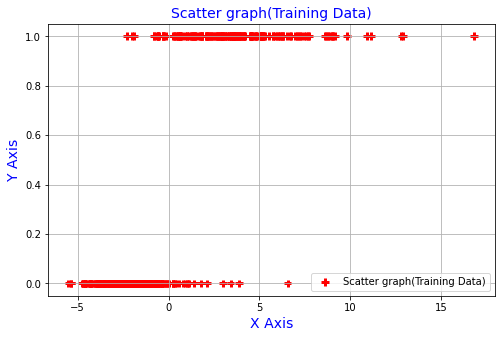

In [44]:
# plt.figure(figsize=(8,5))
# plt.title("Scatter graph(Training Data)", fontsize= 14, color='blue')
# plt.xlabel("X Axis",  fontsize= 14, color='blue')
# plt.ylabel("Y Axis",  fontsize= 14, color='blue')
# plt.grid()
# plt.scatter(X_train,y_train, lw=3, color="red", linestyle="dashed", label="Scatter graph(Training Data)", s=60, marker='+' ) 
# plt.legend(loc="best")
# plt.show()

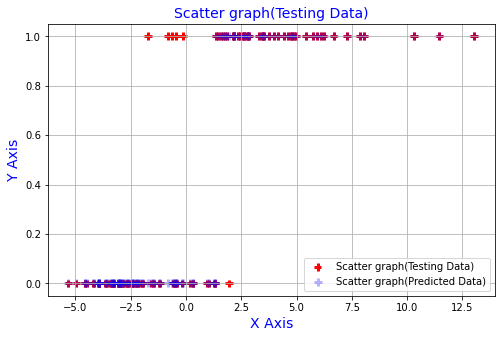

In [45]:
# plt.figure(figsize=(8,5))
# plt.title("Scatter graph(Testing Data)", fontsize= 14, color='blue')
# plt.xlabel("X Axis",  fontsize= 14, color='blue')
# plt.ylabel("Y Axis",  fontsize= 14, color='blue')
# plt.grid()
# plt.scatter(X_test,y_test, lw=3, color="red", linestyle="dashed", label="Scatter graph(Testing Data)", s=60, marker='+') 
# plt.scatter(X_test,y_pred1, lw=3, color="blue",label="Scatter graph(Predicted Data)",s=60, marker='+', alpha=0.3) 
# plt.legend(loc="best")
# plt.show()

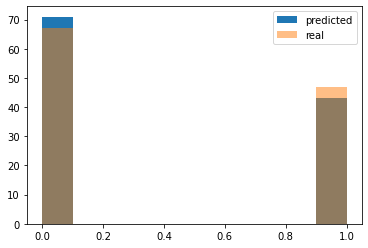

In [46]:
# plt.hist(y_pred1,label='predicted')
# plt.hist(y_test,alpha=0.5,label='real')
# plt.legend(loc='best')
# plt.show()

# Logistic Regression

In [27]:
log=LogisticRegression(random_state=0)

In [28]:
log.fit(X_train,y_train)
y_pred2=log.predict(X_test)

In [29]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [30]:
print("Accuracy :",metrics.accuracy_score(y_test, y_pred2))
print("Precision :",metrics.precision_score(y_test, y_pred2))
print("Recall :",metrics.recall_score(y_test, y_pred2))
print("F1 Score :",metrics.f1_score(y_test, y_pred2))

Accuracy : 0.9649122807017544
Precision : 0.9574468085106383
Recall : 0.9574468085106383
F1 Score : 0.9574468085106385


Text(0.5, 1.0, 'test vs pred')

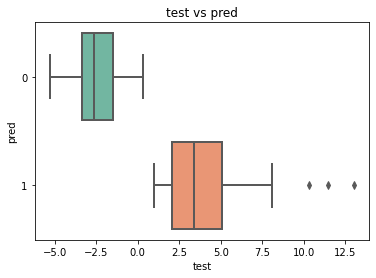

In [51]:
# df=pd.DataFrame(X_test)
# df['pred']=y_pred2
# df['test']=df[0]
# df.drop([0],axis='columns',inplace=True)
# sns.boxplot(x='test',y="pred",data=df,orient="h", palette="Set2",linewidth=2)
# plt.title("test vs pred")

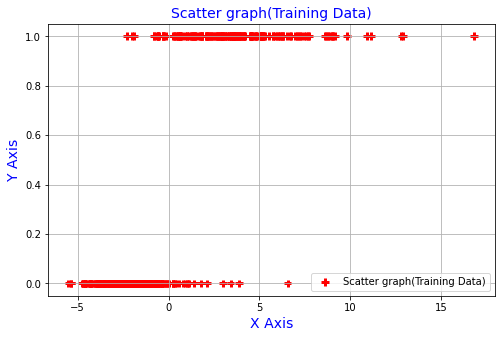

In [52]:
# plt.figure(figsize=(8,5))
# plt.title("Scatter graph(Training Data)", fontsize= 14, color='blue')
# plt.xlabel("X Axis",  fontsize= 14, color='blue')
# plt.ylabel("Y Axis",  fontsize= 14, color='blue')
# plt.grid()
# plt.scatter(X_train,y_train, lw=3, color="red", linestyle="dashed", label="Scatter graph(Training Data)", s=60, marker='+' ) 
# plt.legend(loc="best")
# plt.show()

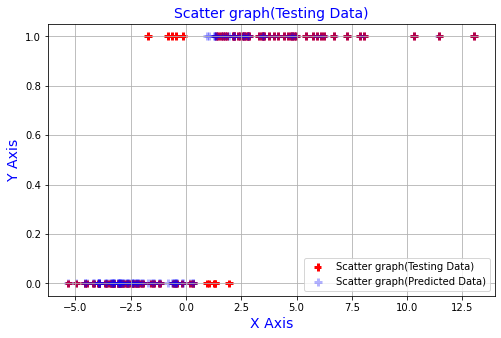

In [37]:
# plt.figure(figsize=(8,5))
# plt.title("Scatter graph(Testing Data)", fontsize= 14, color='blue')
# plt.xlabel("X Axis",  fontsize= 14, color='blue')
# plt.ylabel("Y Axis",  fontsize= 14, color='blue')
# plt.grid()
# plt.scatter(X_test,y_test, lw=3, color="red", linestyle="dashed", label="Scatter graph(Testing Data)", s=60, marker='+') 
# plt.scatter(X_test,y_pred2, lw=3, color="blue",label="Scatter graph(Predicted Data)",s=60, marker='+', alpha=0.3) 
# plt.legend(loc="best")
# plt.show()

# SVM

In [31]:
svm=SVC(kernel='linear')
svm.fit(X_train,y_train)

SVC(kernel='linear')

In [32]:
y_pred3=svm.predict(X_test)

In [33]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [34]:
print("Accuracy :",metrics.accuracy_score(y_test, y_pred3))
print("Precision :",metrics.precision_score(y_test, y_pred3))
print("Recall :",metrics.recall_score(y_test, y_pred3))
print("F1 Score :",metrics.f1_score(y_test, y_pred3))

Accuracy : 0.9736842105263158
Precision : 0.9782608695652174
Recall : 0.9574468085106383
F1 Score : 0.967741935483871


In [36]:
# plt.figure(figsize=(8,5))
# plt.title("Scatter graph(Training Data)", fontsize= 14, color='blue')
# plt.xlabel("X Axis",  fontsize= 14, color='blue')
# plt.ylabel("Y Axis",  fontsize= 14, color='blue')
# plt.grid()
# plt.scatter(X_train,y_train, lw=3, color="red", linestyle="dashed", label="Scatter graph(Training Data)", s=60, marker='+' ) 
# plt.legend(loc="best")
# plt.show()

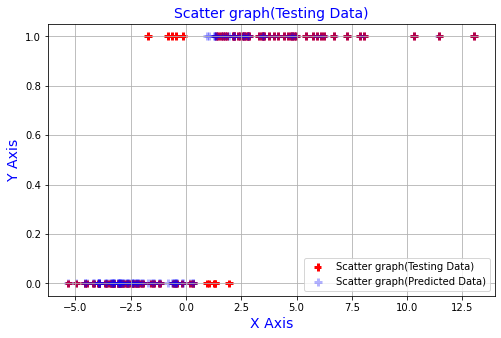

In [43]:
# plt.figure(figsize=(8,5))
# plt.title("Scatter graph(Testing Data)", fontsize= 14, color='blue')
# plt.xlabel("X Axis",  fontsize= 14, color='blue')
# plt.ylabel("Y Axis",  fontsize= 14, color='blue')
# plt.grid()
# plt.scatter(X_test,y_test, lw=3, color="red", linestyle="dashed", label="Scatter graph(Testing Data)", s=60, marker='+') 
# plt.scatter(X_test,y_pred2, lw=3, color="blue",label="Scatter graph(Predicted Data)",s=60, marker='+', alpha=0.3) 
# plt.legend(loc="best")
# plt.show()

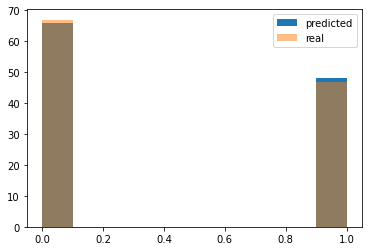

In [44]:
# plt.hist(y_pred3,label='predicted')
# plt.hist(y_test,alpha=0.5,label='real')
# plt.legend(loc='best')
# plt.show()

# Saving trained model

In [37]:
import pickle

In [39]:
filename='svm_trained.pkl'
pickle.dump(svm,open(filename,'wb'))

In [40]:
# loading the saved model
loaded_model=pickle.load(open('svm_trained.pkl','rb'))

In [41]:
input_data=(17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189)

#changing the input data to numpy array
inp_dat_np=np.asarray(input_data)

#reshaping the array as we are predicting for one instance
inp_data=inp_dat_np.reshape(1,-1)

predict=svm.predict(inp_data)
print(predict)

if(predict[0]==0):
    print("Benign")
else:
    print("Malignant")

[1]
Malignant
